In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


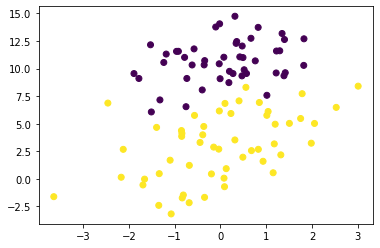

In [2]:
# 载入数据
data = np.genfromtxt("LR-testSet.csv", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]

plt.scatter(x_data[:,0],x_data[:,1],c=y_data) 
plt.show()

In [3]:
#创建决策树模型
model = tree.DecisionTreeClassifier()
#输入数据建立模型
model.fit(x_data,y_data)

DecisionTreeClassifier()

In [4]:
# 导出决策树
import graphviz # http://www.graphviz.org/

dot_data = tree.export_graphviz(model, 
                                out_file = None, 
                                feature_names = ['x','y'],
                                class_names = ['label0','label1'],
                                filled = True,
                                rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)

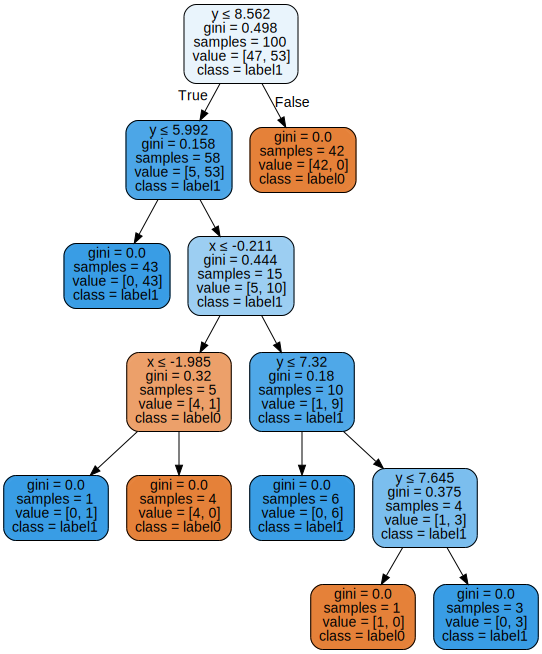

In [5]:
graph

In [6]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

In [7]:
# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

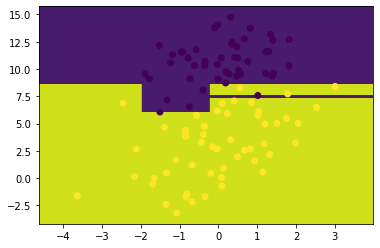

In [8]:
z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [9]:
predictions = model.predict(x_data)
print(classification_report(predictions,y_data))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

